<a href="https://colab.research.google.com/github/jcbertucci/MVP_-Machine-Learning-Analytics/blob/main/MVP_PUC_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Planilhas disponíveis: ['amazon_uk_shoes_products_datase']
Visualização inicial do dataset:
                                      url  \
0  https://www.amazon.co.uk/dp/B07SBX32T5   
1  https://www.amazon.co.uk/dp/B07SBX32T5   
2  https://www.amazon.co.uk/dp/B07SBX32T5   
3  https://www.amazon.co.uk/dp/B07SBX32T5   
4  https://www.amazon.co.uk/dp/B08SW434MG   

                                     Nome do produto Nome do avaliador  \
0  Klasified Women's Transparent Clear Sneaker Sh...  Jocelyn McSayles   
1  Klasified Women's Transparent Clear Sneaker Sh...      Kenia Rivera   
2  Klasified Women's Transparent Clear Sneaker Sh...       Chris Souza   
3  Klasified Women's Transparent Clear Sneaker Sh...   Amazon Customer   
4  GUESS Women's Bradly Gymnastics Shoe, White, 7 UK         Graziella   

  título da avaliação                                 texto da avaliação  \
0             Love em  Love these. Was looking for converses and thes...   
1  The plastic ripped  The shoes are ver

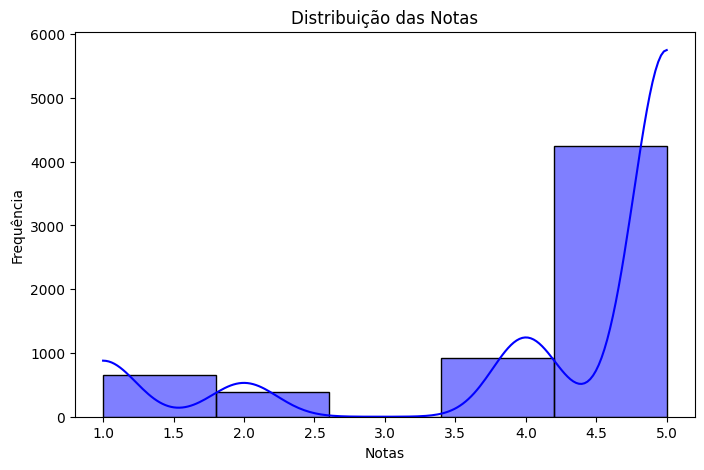

<ipython-input-1-4d192093bd93>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='compra verificada', data=df, palette='pastel')


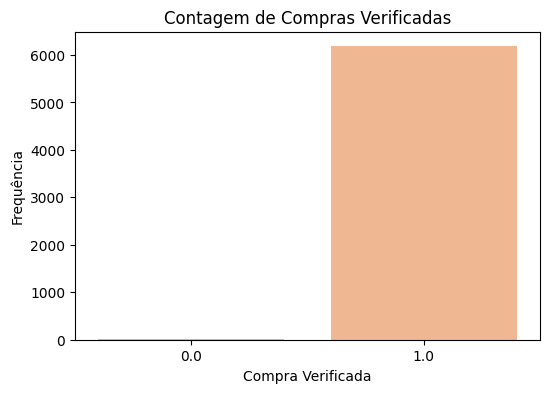


Tamanho do conjunto de treinamento: 4954
Tamanho do conjunto de teste: 1239

Acurácia do Modelo: 0.87409200968523

Relatório de Classificação:
               precision    recall  f1-score   support

    negative       0.92      0.27      0.42       208
    positive       0.87      1.00      0.93      1031

    accuracy                           0.87      1239
   macro avg       0.90      0.63      0.68      1239
weighted avg       0.88      0.87      0.84      1239



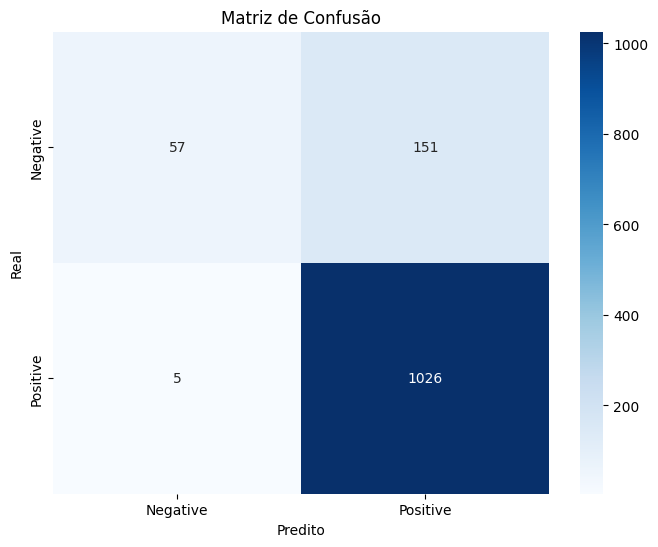


Melhores hiperparâmetros: {'C': 10, 'solver': 'lbfgs'}

Acurácia após otimização: 0.9055690072639225


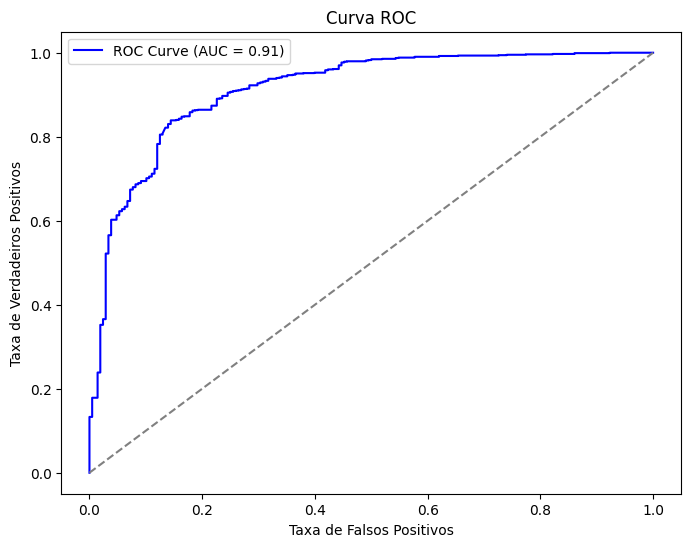


Acurácia usando Pipeline: 0.9055690072639225

Modelo salvo como 'sentiment_analysis_pipeline.pkl'


In [1]:
# ========================================
# Importação de Bibliotecas
# ========================================
# Importa as bibliotecas necessárias para manipulação de dados, visualização, modelagem e salvamento.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
import joblib

# ========================================
# 1. Carregamento do Dataset
# ========================================
# URL do arquivo no GitHub
url = 'https://raw.githubusercontent.com/jcbertucci/MVP_-Machine-Learning-Analytics/main/Amazon%20shoes%20.xlsx'

# Carregando o arquivo Excel
data = pd.ExcelFile(url)

# Exibindo as planilhas disponíveis
print("Planilhas disponíveis:", data.sheet_names)

# Lendo a planilha específica
df = data.parse('amazon_uk_shoes_products_datase')

# Visualizando as primeiras linhas
print("Visualização inicial do dataset:")
print(df.head())

# ========================================
# 2. Análise e Limpeza de Dados
# ========================================
# Verificando valores ausentes em cada coluna
print("\nValores ausentes por coluna:\n", df.isnull().sum())

# Criando rótulos de sentimentos
df = df[df['nota'].notnull()]
df['sentiment'] = df['nota'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else None))
df = df[df['sentiment'].notnull()]  # Remove neutros
df = df[df['texto da avaliação'].notnull()]  # Remove textos ausentes

print("\nDados após limpeza e criação de rótulos:")
print(df[['nota', 'sentiment', 'texto da avaliação']].head())

# ========================================
# 3. Visualizações Exploratórias
# ========================================
# Histograma para analisar a distribuição das notas
plt.figure(figsize=(8, 5))
sns.histplot(df['nota'], bins=5, kde=True, color='blue')
plt.title('Distribuição das Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

# Contagem de compras verificadas
if 'compra verificada' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='compra verificada', data=df, palette='pastel')
    plt.title('Contagem de Compras Verificadas')
    plt.xlabel('Compra Verificada')
    plt.ylabel('Frequência')
    plt.show()

# ========================================
# 4. Divisão do Dataset
# ========================================
# Dividindo os dados em conjuntos de treino (80%) e teste (20%)
X = df['texto da avaliação']  # Dados de entrada (texto)
y = df['sentiment']  # Rótulos de saída (positivo/negativo)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTamanho do conjunto de treinamento: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

# ========================================
# 5. Vetorização dos Textos
# ========================================
# Convertendo os textos em representações numéricas com TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ========================================
# 6. Treinamento e Avaliação do Modelo
# ========================================
# Treinando o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test_vec)

# Avaliação do modelo inicial
print("\nAcurácia do Modelo:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# ========================================
# 7. Otimização de Hiperparâmetros
# ========================================
# Ajustando os parâmetros do modelo para melhor desempenho
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_vec)

print("\nMelhores hiperparâmetros:", grid_search.best_params_)
print("\nAcurácia após otimização:", accuracy_score(y_test, y_pred_optimized))

# ========================================
# 8. Curva ROC
# ========================================
# Avaliação do desempenho do modelo otimizado usando a Curva ROC
y_test_prob = best_model.predict_proba(X_test_vec)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label='positive')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

# ========================================
# 9. Implementação com Pipeline
# ========================================
# Criando um pipeline para integração de vetorização e modelo
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, C=grid_search.best_params_['C'], solver=grid_search.best_params_['solver']))
])

pipeline.fit(X_train, y_train)
y_pipeline_pred = pipeline.predict(X_test)
print("\nAcurácia usando Pipeline:", accuracy_score(y_test, y_pipeline_pred))

# ========================================
# 10. Salvando o Modelo Treinado
# ========================================
# Salvando o pipeline treinado para reuso futuro
joblib.dump(pipeline, 'sentiment_analysis_pipeline.pkl')
print("\nModelo salvo como 'sentiment_analysis_pipeline.pkl'")
